# Fraud Detection using Machine Learning

### Dataset : creditcard.csv

### Import Libraries

In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_auc_score, roc_curve
)
from sklearn.ensemble import RandomForestClassifier


### Load Dataset

In [2]:
data = pd.read_csv("creditcard.csv")
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Class Distribution

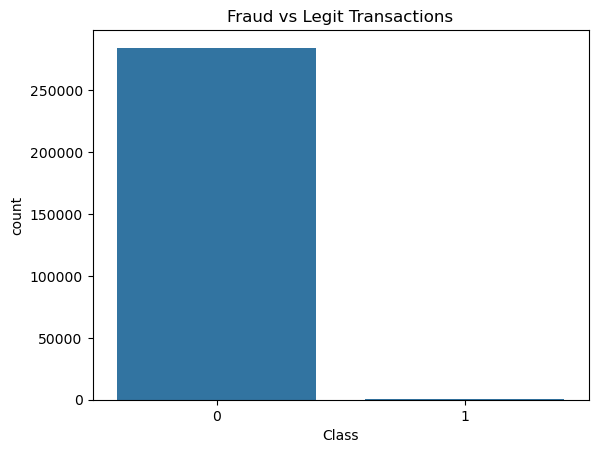

In [6]:
sns.countplot(x='Class', data=data)
plt.title("Fraud vs Legit Transactions")
plt.show()


### Feature Scaling (Amount & Time)

In [7]:
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])
data['Time'] = scaler.fit_transform(data[['Time']])


### Feature & Target Split

In [10]:
X = data.drop('Class', axis=1)
y = data['Class']


### Train-Test Split 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


### Model 1: Logistic Regression (Baseline)

In [12]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))


Accuracy: 0.9991573329588147
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



### Model 2: Decision Tree Classifier

In [13]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))


Accuracy: 0.9994557775359011
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.78      0.83        98

    accuracy                           1.00     56962
   macro avg       0.95      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



### Confusion Matrix (Decision Tree)

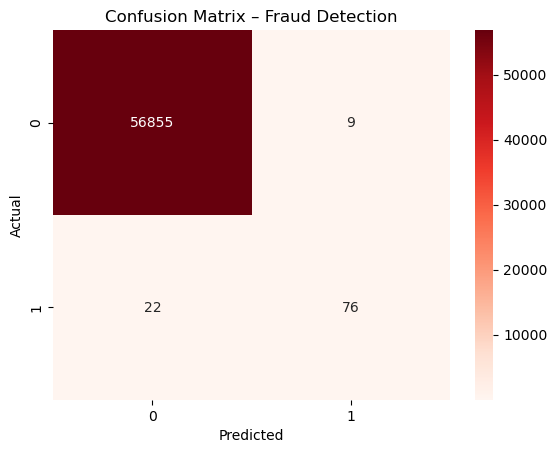

In [14]:
cm = confusion_matrix(y_test, dt_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix – Fraud Detection")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### ROC-AUC Curve (BEST METRIC)

In [15]:
lr_probs = lr.predict_proba(X_test)[:,1]
dt_probs = dt.predict_proba(X_test)[:,1]

lr_auc = roc_auc_score(y_test, lr_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

print("Logistic AUC:", lr_auc)
print("Decision Tree AUC:", dt_auc)


Logistic AUC: 0.9572835078037969
Decision Tree AUC: 0.902930586978742


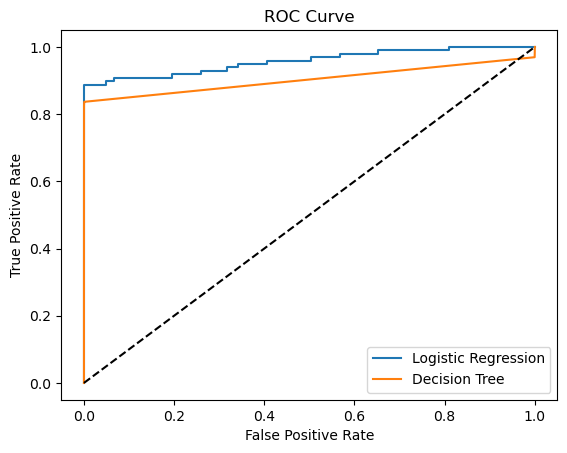

In [16]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)

plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


### Stronger Model (Random Forest)

In [22]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_rf_prob = rf.predict_proba(X_test)[:, 1]
print("RF ROC-AUC:", roc_auc_score(y_test, y_rf_prob))

RF ROC-AUC: 0.9803962982210328


###  Feature Importance (Explainability)

In [23]:
importances = pd.Series(
    rf.feature_importances_, index=X.columns
).sort_values(ascending=False)

print(importances.head(10))

V14    0.179743
V10    0.115759
V4     0.113484
V12    0.098009
V17    0.091131
V3     0.066361
V11    0.055058
V16    0.050815
V2     0.029468
V7     0.025290
dtype: float64


### Fraud Detection – Additional Visualizations

##### Class Imbalance Visualization

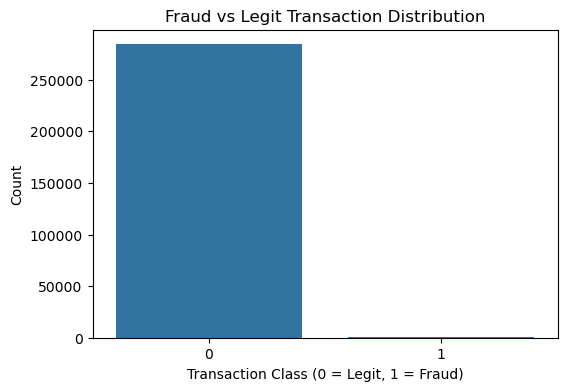

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data)
plt.title("Fraud vs Legit Transaction Distribution")
plt.xlabel("Transaction Class (0 = Legit, 1 = Fraud)")
plt.ylabel("Count")
plt.show()


##### Transaction Amount Distribution

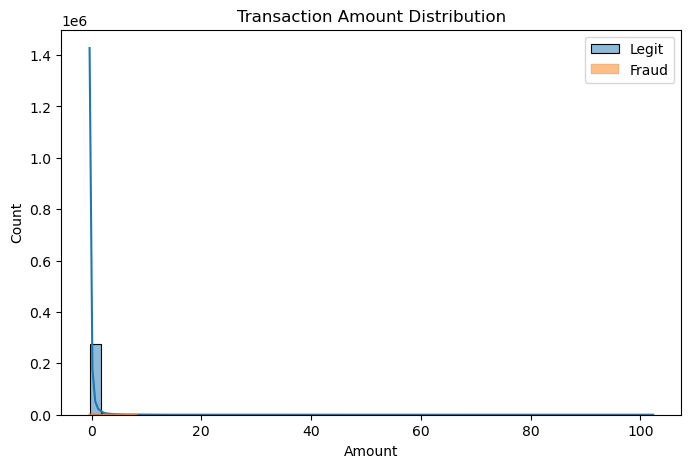

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(data[data['Class']==0]['Amount'], bins=50, kde=True, label='Legit')
sns.histplot(data[data['Class']==1]['Amount'], bins=50, kde=True, label='Fraud')
plt.legend()
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.show()


### Time vs Fraud Pattern

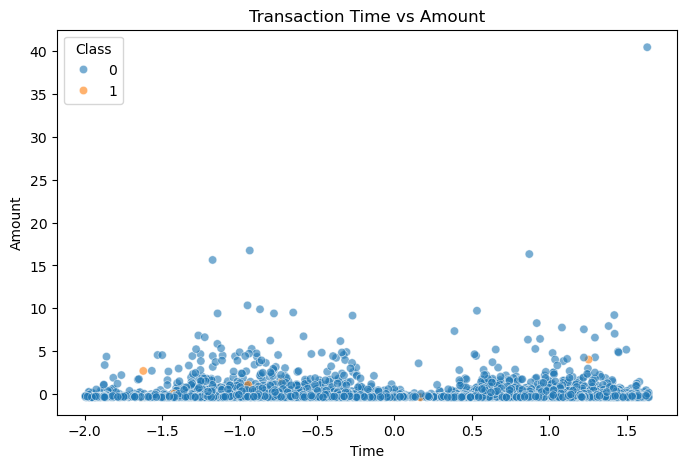

In [28]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Time',
    y='Amount',
    hue='Class',
    data=data.sample(5000),   # sampling for speed
    alpha=0.6
)
plt.title("Transaction Time vs Amount")
plt.show()


# Description

Developed a fraud detection system using Logistic Regression and Decision Tree classifiers on highly imbalanced financial transaction data. Performed data preprocessing, feature scaling, and stratified sampling to handle class imbalance. Evaluated models using precision, recall, confusion matrix, and ROC-AUC metrics. Created insightful visualizations to analyze transaction patterns and model performance, enabling effective identification of fraudulent activities.

# Completed